# BITCOIN PRICE FORECASTING PROJECT
## TIME SERIES APPROACH

Student name: Hera K.

Student pace: full time

Scheduled project review date/time: 05/26/2023

Instructor name: Daniel Burdeno


# Overview
* This project aims to forecast future bitcoin price based on historical bitcoin price data by time series approach. In time series analysis, time is a crucial variable of the data, because it shows us how the data adjusts over the course of the data points as well as the result.
* Time series is a specific way of analyzing a sequence. It can show likely changes in the data, like seasonality or cyclic behavior, which provides a better understanding of data variables and helps forecast better. 
 

# Business Problem

To come up with a long-lasting solution, the world needs innovative and robust perspective for global system. Increasing demand worldwide makes Bitcoin much more attractive, though it looks like untrusty and jeopardous venture for now. Bitcoin prices are tried to be predicted by investors or majority. Bitcoin is aspiring critical up-and-coming for future as it ensures an analytical, favorable, strategic system emerging in digitalized world. To forecast bitcoin future prices helps to be enabled to plan for investment wisely.

# Data 

Columns in our dataframe is mentioned as below.It operates 24 hours a day nonstop.

* **Date** : Index in our time series that specifies the date associated with the price. (USD)

* **Open Price**: The first price of BTC was purchased on the trading day (USD)

* **Close Price**: The last price of BTC was purchased at the end of trading day (USD)

* **High:** The maximum price of BTC was purchased on trading day (USD)

* **Low:** The minimum price of BTC was purchased on the trading day (USD)

* **Adjusted Closing Price**: Stock exchanges witness buying and selling of millions of shares every minute. When the exchanges close, the last trading price of the stock is recorded as the closing price of the share (USD)

* **Volume**: The sum of actual trades made during the trading day (USD)

- All Time High $68,789.63 USD   in 2021-11-10
- Max Volume 350,967,941.479 USD in 2021-02-26

In [1]:
# Data manipulation 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Read the data from csv file
df = pd.read_csv('BTC-USD.csv',
                index_col = 'Date', parse_dates=True)

# Rename the columns 
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume':'volume'})
df

,open,high,low,close,Adj Close,volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518


# Exploration Data Analysis

In [3]:
# Check the columns are same as each other
display(df[df['close'] == df['Adj Close']].shape, df.shape)

# Drop the same columns 
df = df.drop(columns=['Adj Close'], axis=1, inplace=False)

# Display first 3 columns of head, last 3 columns of tail
display(df.head(3), df.tail(3))
display(df.info())

(3153, 6)

(3153, 6)

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700


,open,high,low,close,volume
Date,,,,,
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039063,28847.710938,15548678514
2023-05-05,28855.175781,29659.476563,28848.173828,29495.498047,17805907968


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3153 entries, 2014-09-17 to 2023-05-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3153 non-null   float64
 1   high    3153 non-null   float64
 2   low     3153 non-null   float64
 3   close   3153 non-null   float64
 4   volume  3153 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.8 KB


None

* **I have date as datetime from 2014 to 2023 years, open, high, low and close columns as float, volume as integer in our dataframe.
I have 3153 entries and total 5 columns.**

* **I will focus on historical close price for my forecasting models to predict future BTC price. It is daily prices on the dataset.** 

### I check if the duplicated columns, missing info, null info is available in the dataframe
* It looks there is no duplicated and null info 

In [4]:
# Check duplicated columns 
display(df.duplicated().sum())

# Check how many missing info, null in the dataframe
display(df.isnull().sum())

0

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [5]:
print(f"There are {df.shape[0]} records in our timeseries")

# The idxmax() method returns a Series with the index of the maximum value for each column
print(f'Maximum value for each column:\n{df.idxmax(axis=0, skipna=True)}')
      

# Check our df shape and maximum number of each column

print("Open     number of max    : {}".format(df['open'].max()))
print("Close    number of max    : {}".format(df['close'].max()))
print("High     number of max    : {}".format(df['high'].max()))
print("Low      number of max    : {}".format(df['low'].max()))
print("Volume   number of max    : {}".format(df['volume'].max()))

# Check the unique for each column
print("Open     number of unique : {}".format(df['open'].nunique()))
print("Close    number of unique : {}".format(df['close'].nunique()))
print("High     number of unique : {}".format(df['high'].nunique()))
print("Low      number of unique : {}".format(df['low'].nunique()))
print("Volume   number of unique : {}".format(df['volume'].nunique()))

There are 3153 records in our timeseries
Maximum value for each column:
open     2021-11-09
high     2021-11-10
low      2021-11-09
close    2021-11-08
volume   2021-02-26
dtype: datetime64[ns]
Open     number of max    : 67549.734375
Close    number of max    : 67566.828125
High     number of max    : 68789.625
Low      number of max    : 66382.0625
Volume   number of max    : 350967941479
Open     number of unique : 3149
Close    number of unique : 3150
High     number of unique : 3150
Low      number of unique : 3152
Volume   number of unique : 3153


# Data Visualization

* I visualize the data to grab much more clear observation.

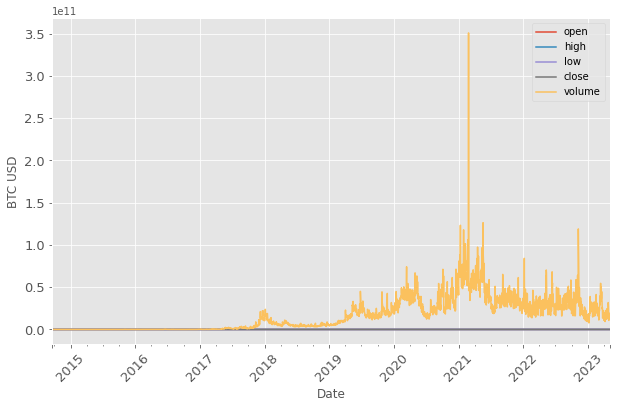

In [8]:
# All columns in dataframe 
df.plot(ylabel= 'BTC USD', fontsize= 13, figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Volume BTC.png", transparent = True, dpi=150)
plt.show()

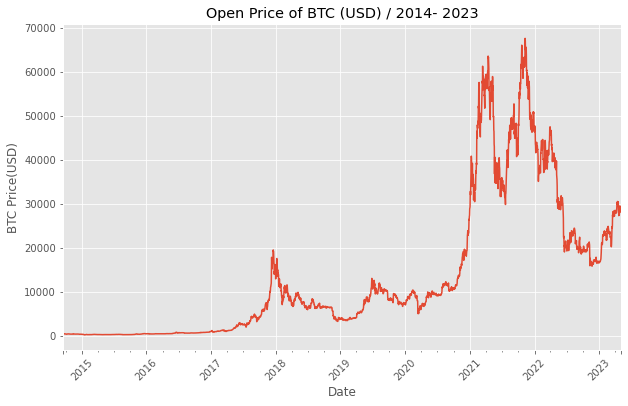

In [9]:
# Open price of Bitcoin from 2014 to 2023

df['open'].plot(ylabel='BTC Price(USD)', title='Open Price of BTC (USD) / 2014- 2023', figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Open Price BTC.png", transparent = True, dpi=150)
plt.show()

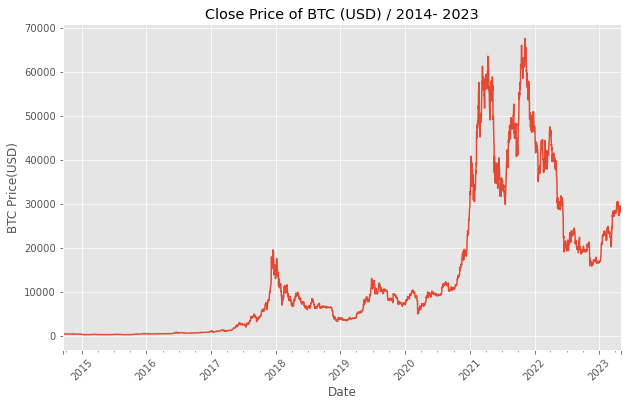

In [10]:
# Close price of Bitcoin from 2014 to 2023

df['close'].plot(ylabel='BTC Price(USD)', title='Close Price of BTC (USD) / 2014- 2023', figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Close Price BTC.png", transparent = True, dpi=150)
plt.show()

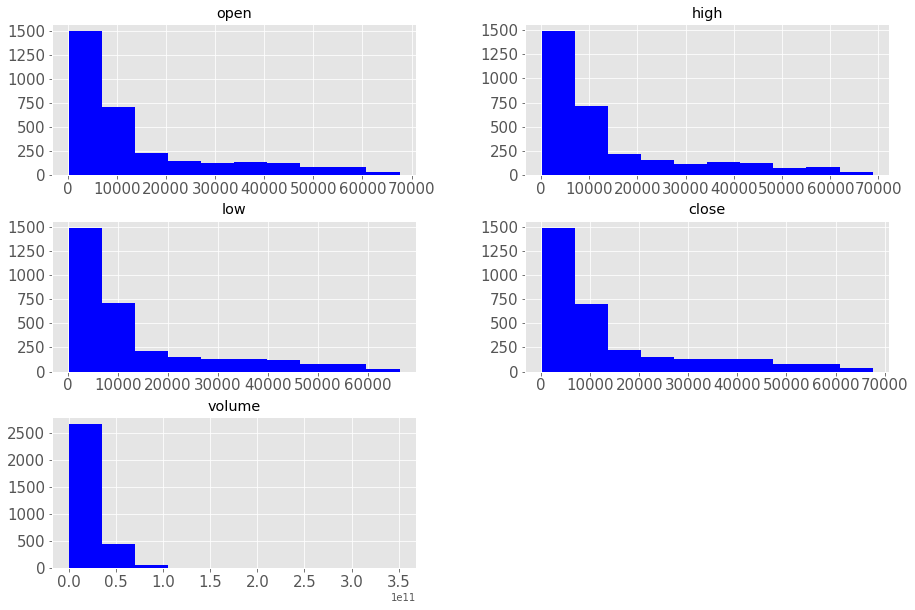

In [17]:
# Checking for normality for all columns (for stat testing)

df.hist(xlabelsize= 15, ylabelsize= 15, figsize=(15, 10), color='blue')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Normality All Columns.png", transparent = True, dpi=150)
plt.show()

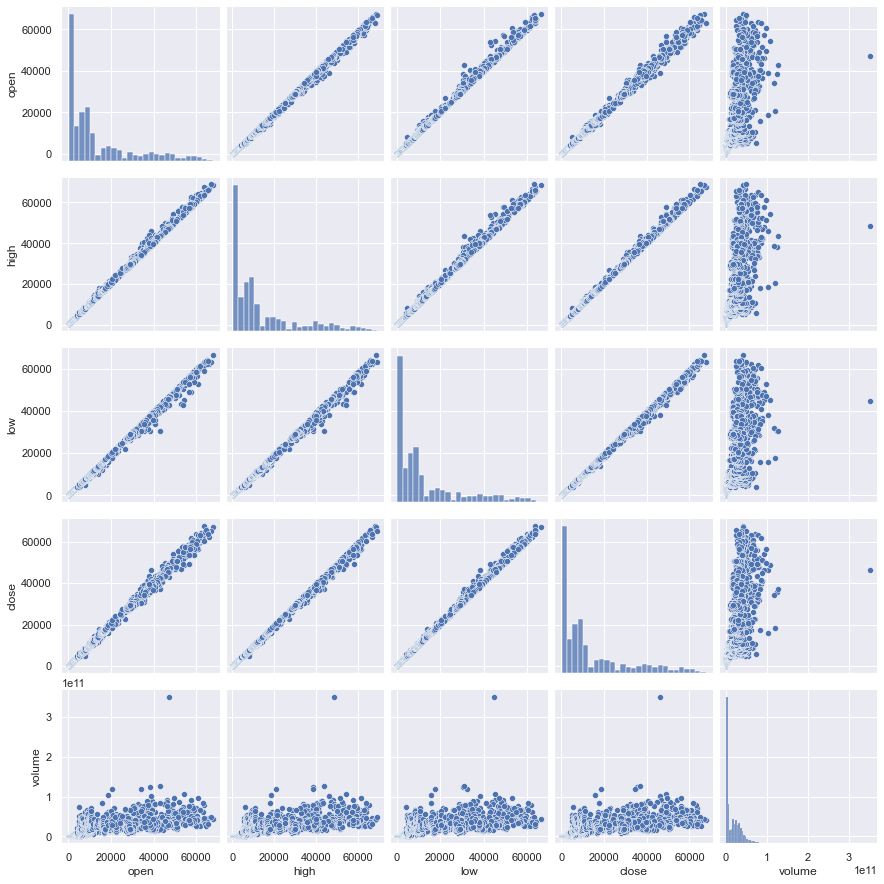

In [18]:
# Correlation all columns 
# All that straight lines, all these prices are incredibely positive correlated with each other
# That shows that the high price is really correlated with the open price,
# Low price is really correlated the open price,
# Close price is really correlated the open price,

sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=df)

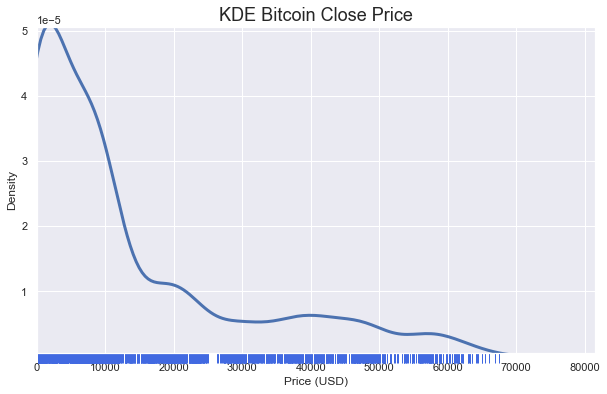

In [19]:
# Density of close price
# KDE distribution of Bitcoin closing price

fig, ax = plt.subplots(figsize=(10, 6))
p = sns.kdeplot(data=df, x='close', linewidth=3, ax=ax)
r = sns.rugplot(data=df, x='close', ax=ax, c='royalblue',
                height=-.03, clip_on=False)

#Save the figure
#plt.savefig("KDE BTC Close Price.png", transparent = True, dpi=150)

p.set(xlim=(0, None))
p.set_title('KDE Bitcoin Close Price', fontsize=18)
p.set_xlabel('Price (USD)');

<AxesSubplot:title={'center':'Comparing The Percentage Change of Open Price- Close Price'}, xlabel='Date'>

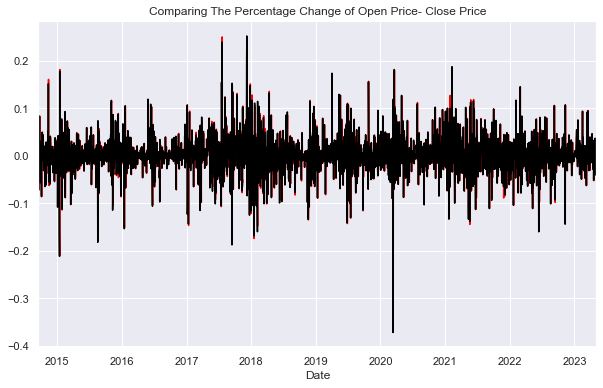

In [20]:
#Volatility
# The percentage increase both open and close price 
# daily return, changing of open price 
# changing of close price

df['open_change'] = (df['open']/df['open'].shift(1)) -1
df['close_change'] = (df['close']/df['close'].shift(1)) -1

df['open_change'].plot(title = 'Comparing The Percentage Change of Open Price- Close Price', color='red', figsize = (10, 6))
df['close_change'].plot(color='black')

#Save the figure
#plt.savefig("Compare % change Open-Close Price.png", transparent = True, dpi=150)

<AxesSubplot:title={'center':'Daily Open-Close (Return) Price'}, xlabel='Date'>

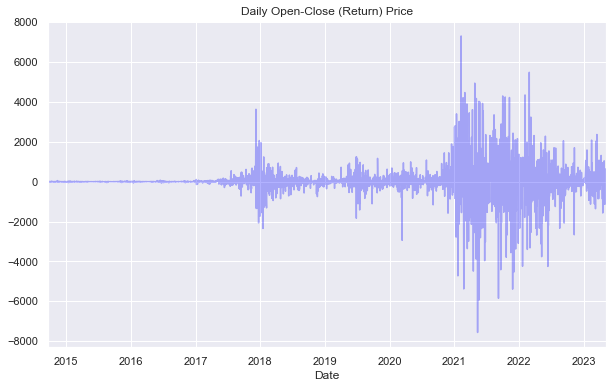

In [21]:
# Daily open close (return) price

df['close-open'] = (df['close'] - df['open'])                
df['close-open'].plot(title = 'Daily Open-Close (Return) Price', alpha = 0.3, color='blue', figsize = (10,6))

#Save the figure
#plt.savefig("Daily Open-Close Price.png", transparent = True, dpi=150)

<AxesSubplot:xlabel='Date', ylabel='BTC USD'>

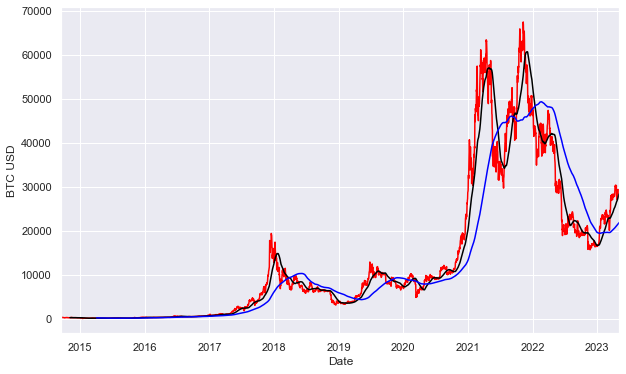

In [22]:
# Check any trend or pattern we can take the help of a 50-day 200-day average
# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
# Bu siteye mutlaka bak bunun uzerinde calis 

df['MA50'] = df['close'].rolling(50).mean()
df['MA200'] = df['close'].rolling(200).mean()

df['close'].plot(ylabel= 'BTC USD', color='red', figsize = (10,6))
df['MA50'].plot(color='black')
df['MA200'].plot(color='blue')

#Save the figure
#plt.savefig("50-day 200-day Avg-Trend.png", transparent = True, dpi=150)

In [23]:
# We created new columns for future 
# open-change
# close-change
# open-close = Daily return price
# MA50 = Any trend 50-day average
# MA200 = Any trend 50-day average
df

,open,high,low,close,volume,open_change,close_change,close-open,MA50,MA200
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,-8.529999,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.019328,-0.071926,-32.419983,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.071700,-0.069843,-29.307007,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.069394,0.035735,14.230988,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.033983,-0.024659,-9.263977,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,-0.000630,-0.040222,-1135.535157,28169.098789,21808.973936
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,-0.039002,0.020966,593.361328,28258.758867,21856.448340
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518,0.021124,0.011359,325.814453,28343.963555,21906.141709


In [24]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', length=3153, freq=None)

# Check Stationary
* I will use daily close price of Bitcoin for prediction, I don't need to resample it because it's already daily price

* I will check the stationary as measuring p value thanks to the Dickey Fuller test. 

* If p value is less than alpha my data is stationary. If not I will use differencing to make it stationary.

In [25]:
# Create close_ts, close column with date

close_ts = df['close']
close_ts

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2023-05-01    28091.568359
2023-05-02    28680.537109
2023-05-03    29006.308594
2023-05-04    28847.710938
2023-05-05    29495.498047
Name: close, Length: 3153, dtype: float64

In [26]:
# Check p value of our close_ts and check if it is stationary

# 1. Test Statistic, 
# 2. p-value, 
# 3. #Lags Used,
# 4. Number of Observations Used
# 5. Critical values
# Check the train 1st differencing stationary
dftest = adfuller(close_ts, autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

p_val = adfuller(close_ts[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is stationary.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

1. ADF         :  -1.5336037381203826
2. P-Value     :  0.5168274345848825
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3123
5. Critical Values :
	 1% :  -3.432445639802861
	 5% :  -2.8624659237441654
	 10% :  -2.567262891276225
The p-value in Dickey-Fuller statistical test is 0.5167428383380318,
Reject the null hypothesis that the differenced data is NOT stationary.


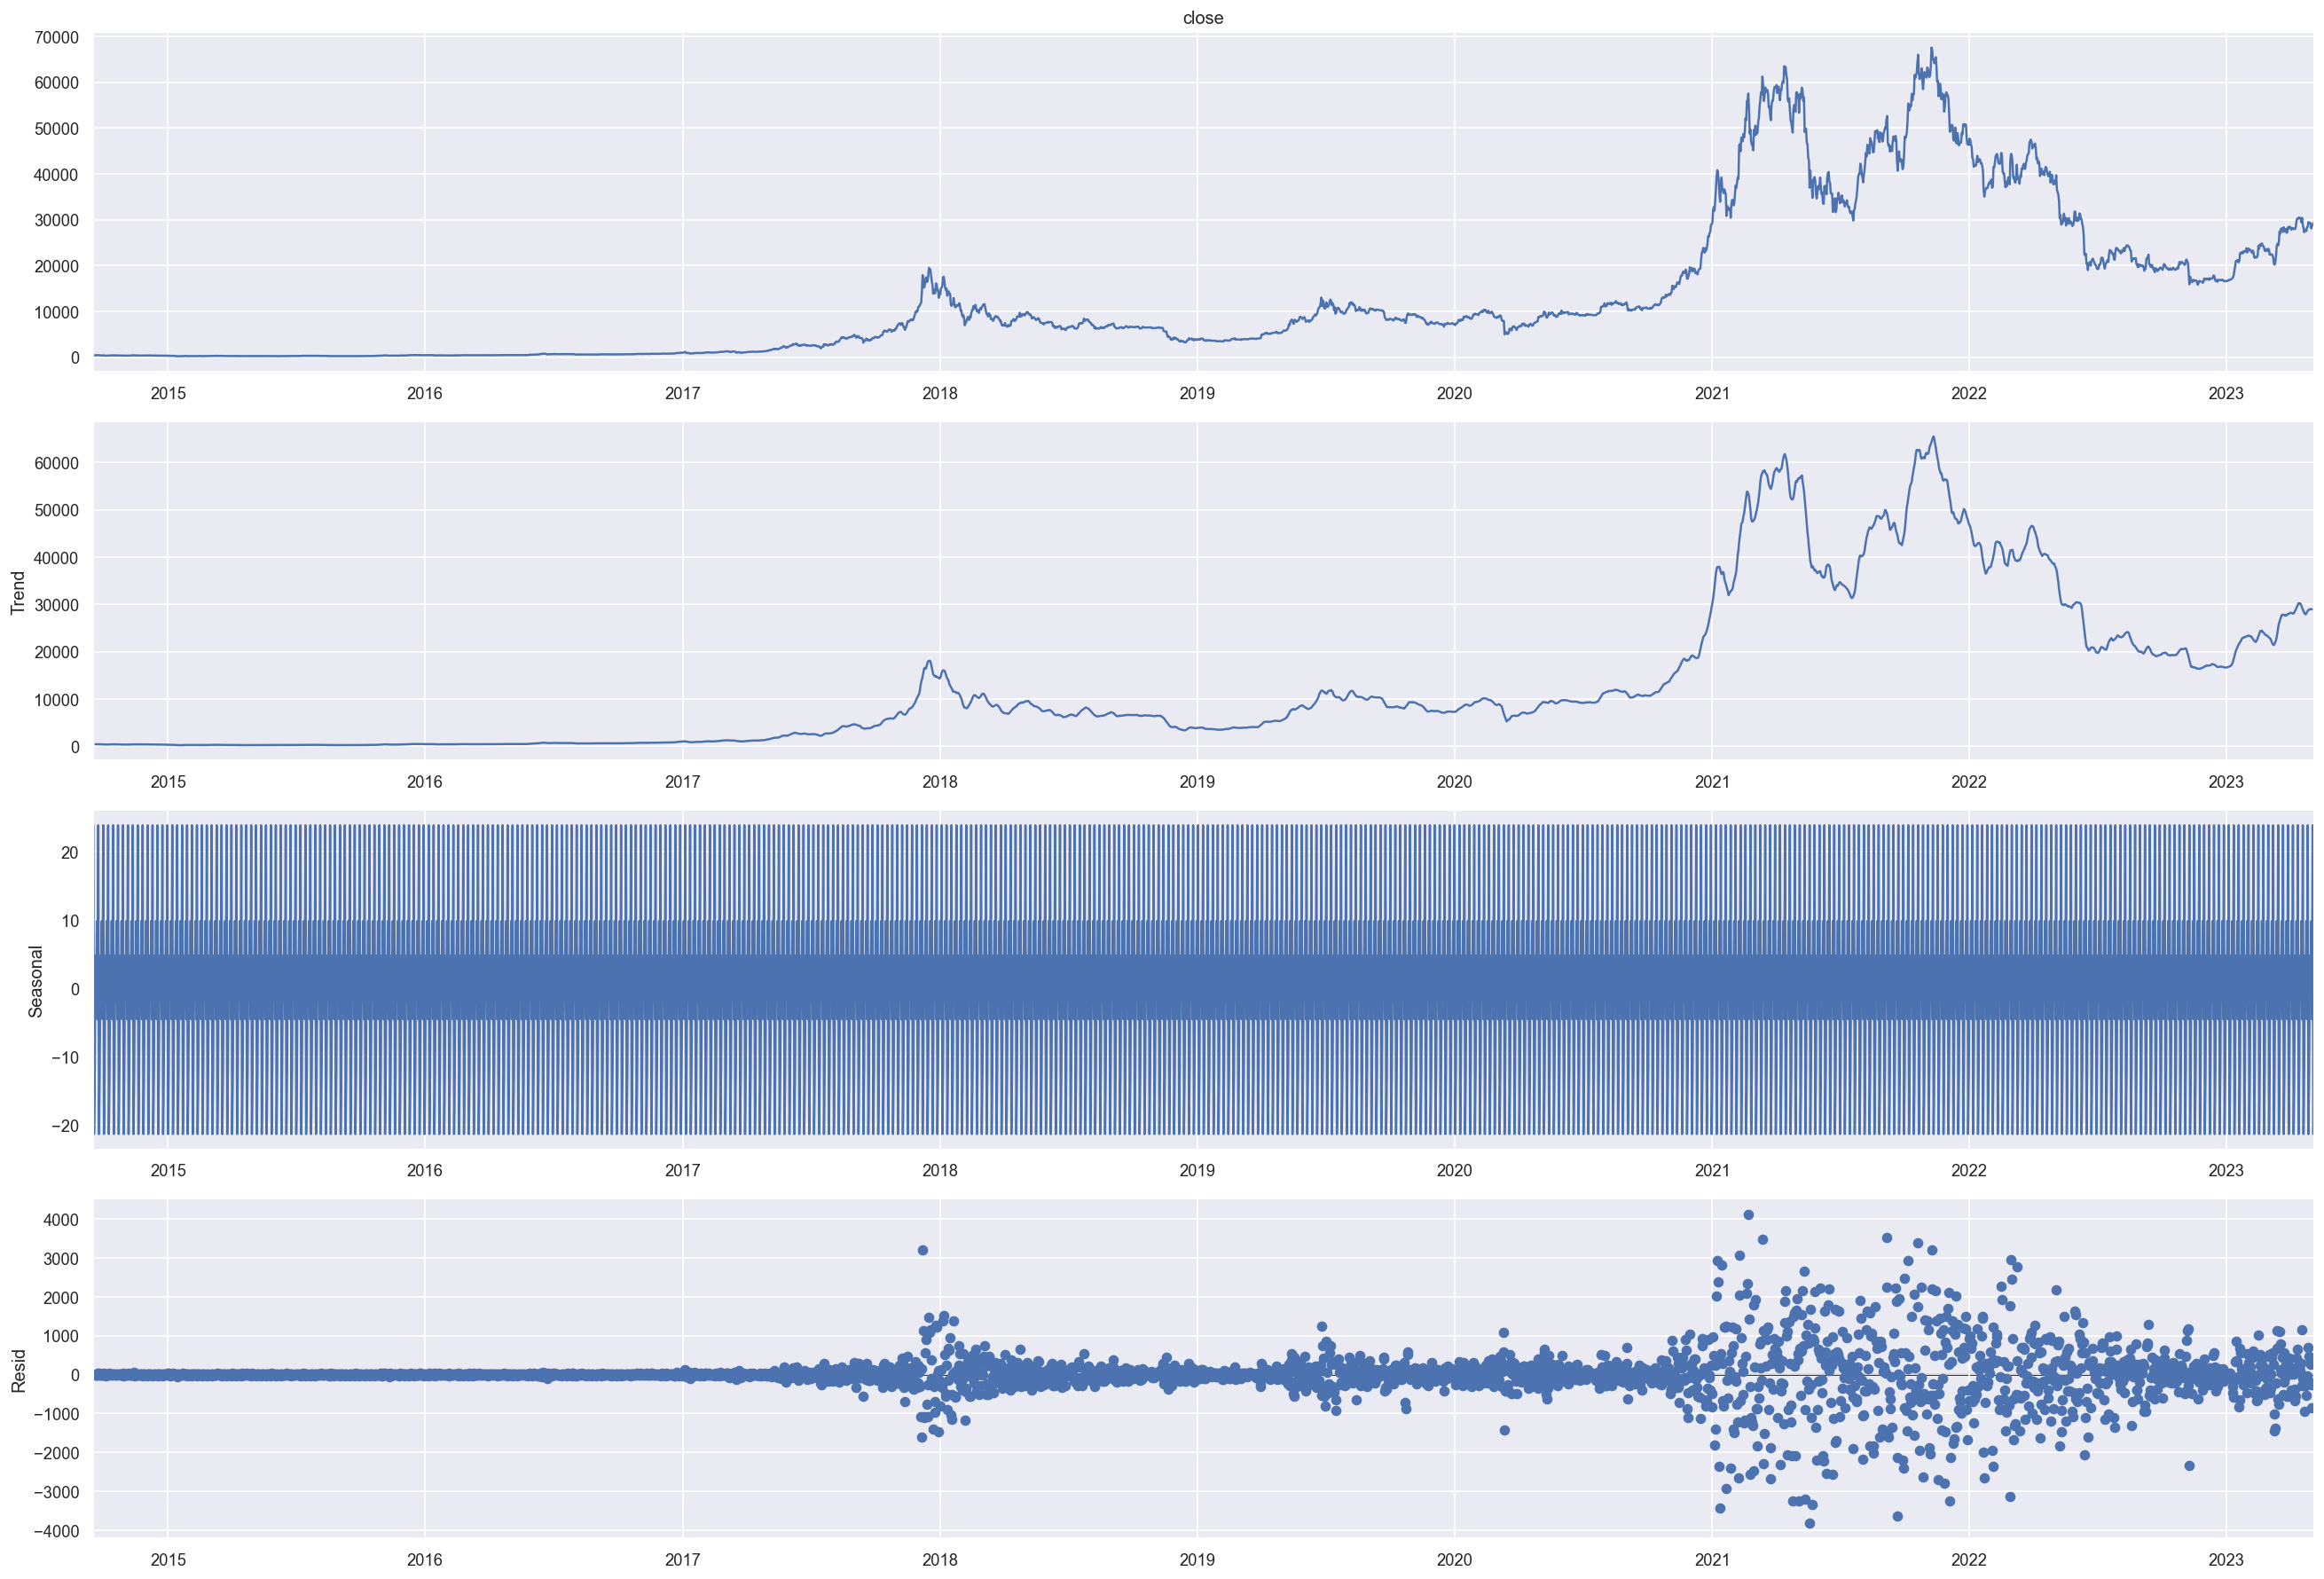

In [32]:
# Daily decomposition
# Check the decomposition of my daily closing price time series
# Trend
# Seasonality
# Noise

from pylab import rcParams
rcParams['figure.figsize'] = 22, 15
decomp_daily = seasonal_decompose(close_ts, model='additive')
fig = decomp_daily.plot()

#Save the figure
plt.savefig("Decomposition Daily BTC.png", transparent = True, dpi=150)
plt.show()

<AxesSubplot:xlabel='Date'>

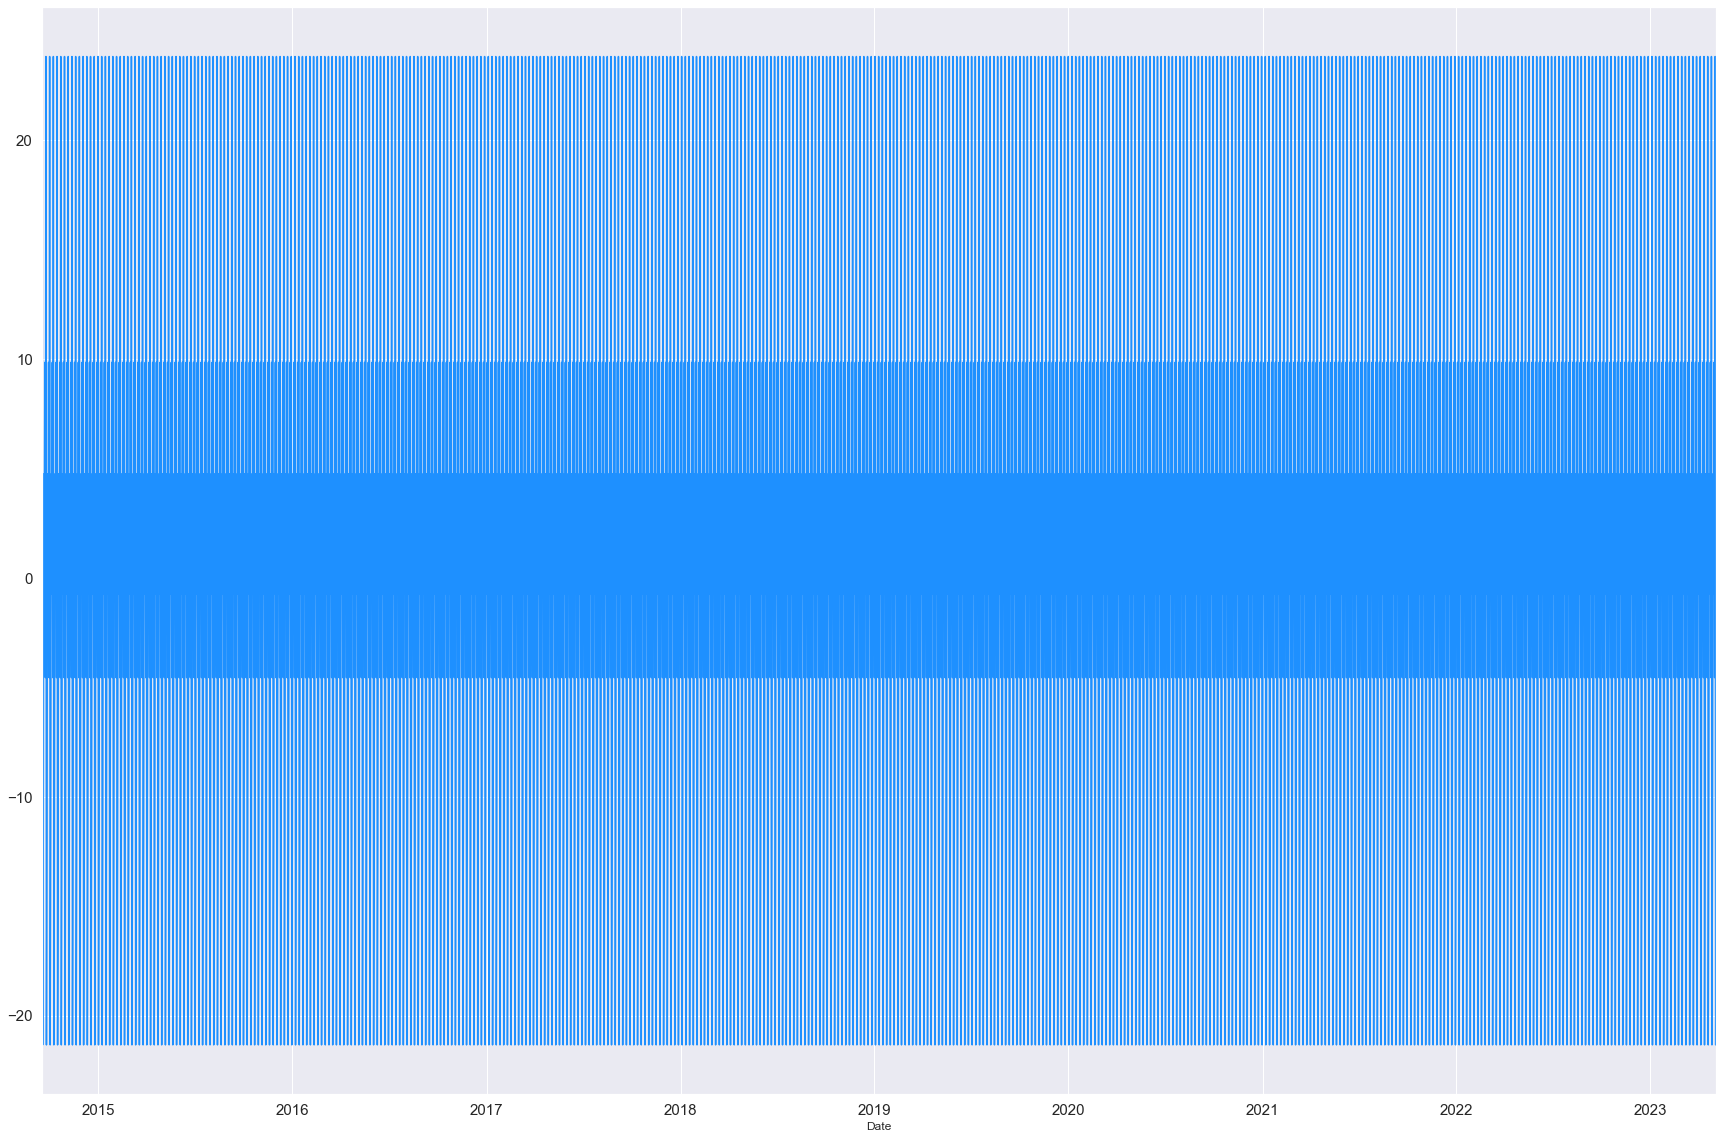

In [47]:
# I have extracted the seasonality from the time series

seasonality=decomp_daily.seasonal
seasonality.plot(fontsize= 15, color='dodgerblue', figsize=(30, 20))

* ARIMA model is useful in the cases where the time series is non-stationary. And the differencing is required to make the time series stationary.I require a stationary time series to perform forecasting using the ARIMA model.
Stationary time series is a time series that is unaffected by these four components. 

# Make Daily Close Price Stationary

* Open price and close price are very close each other. I will continue with closing price for prediction
* I should take a first difference of the data to remove this autocorrelation.
* Visualize the ACF and PACF to visual the differenced data

In [28]:
# Create transformation, difference the data
close_diff = close_ts.diff().dropna()

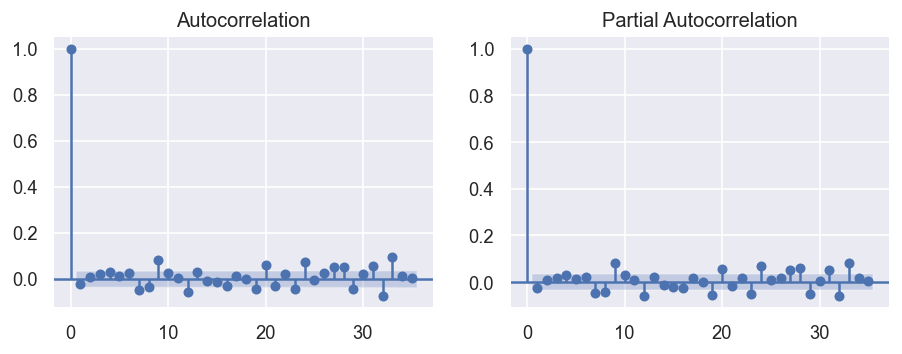

In [29]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

# ACF, Decide for AR, p
plot_acf(close_diff, title='Autocorrelation', ax=axes[0]);

# PACF, Decide for MA term, q
plot_pacf(close_diff, title='Partial Autocorrelation', ax=axes[1]);

#Save the figure
plt.savefig("ACF & PACF.png", transparent = True, dpi=150)

In [30]:
# Check p value of our close_ts and check if it is stationary
# 1. Test Statistic, 2. p-value, 3. #Lags Used, 4. Number of Observations Used, 5. Critical values
dftest = adfuller(close_diff.dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

p_val = adfuller(close_diff[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

1. ADF         :  -9.356284064249085
2. P-Value     :  8.043183725372062e-16
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3123
5. Critical Values :
	 1% :  -3.432445639802861
	 5% :  -2.8624659237441654
	 10% :  -2.567262891276225
The p-value in Dickey-Fuller statistical test is 8.1141213358187e-16,
Differenced data is STATIONARY.



### MODEL ######   
# ONEMLI 

# Basic naive model

In [52]:
# Train Test split 
train_len = 2680
train = df[0:train_len] # first 2680 days as train set
test = df[train_len:]   # 473 days as test set

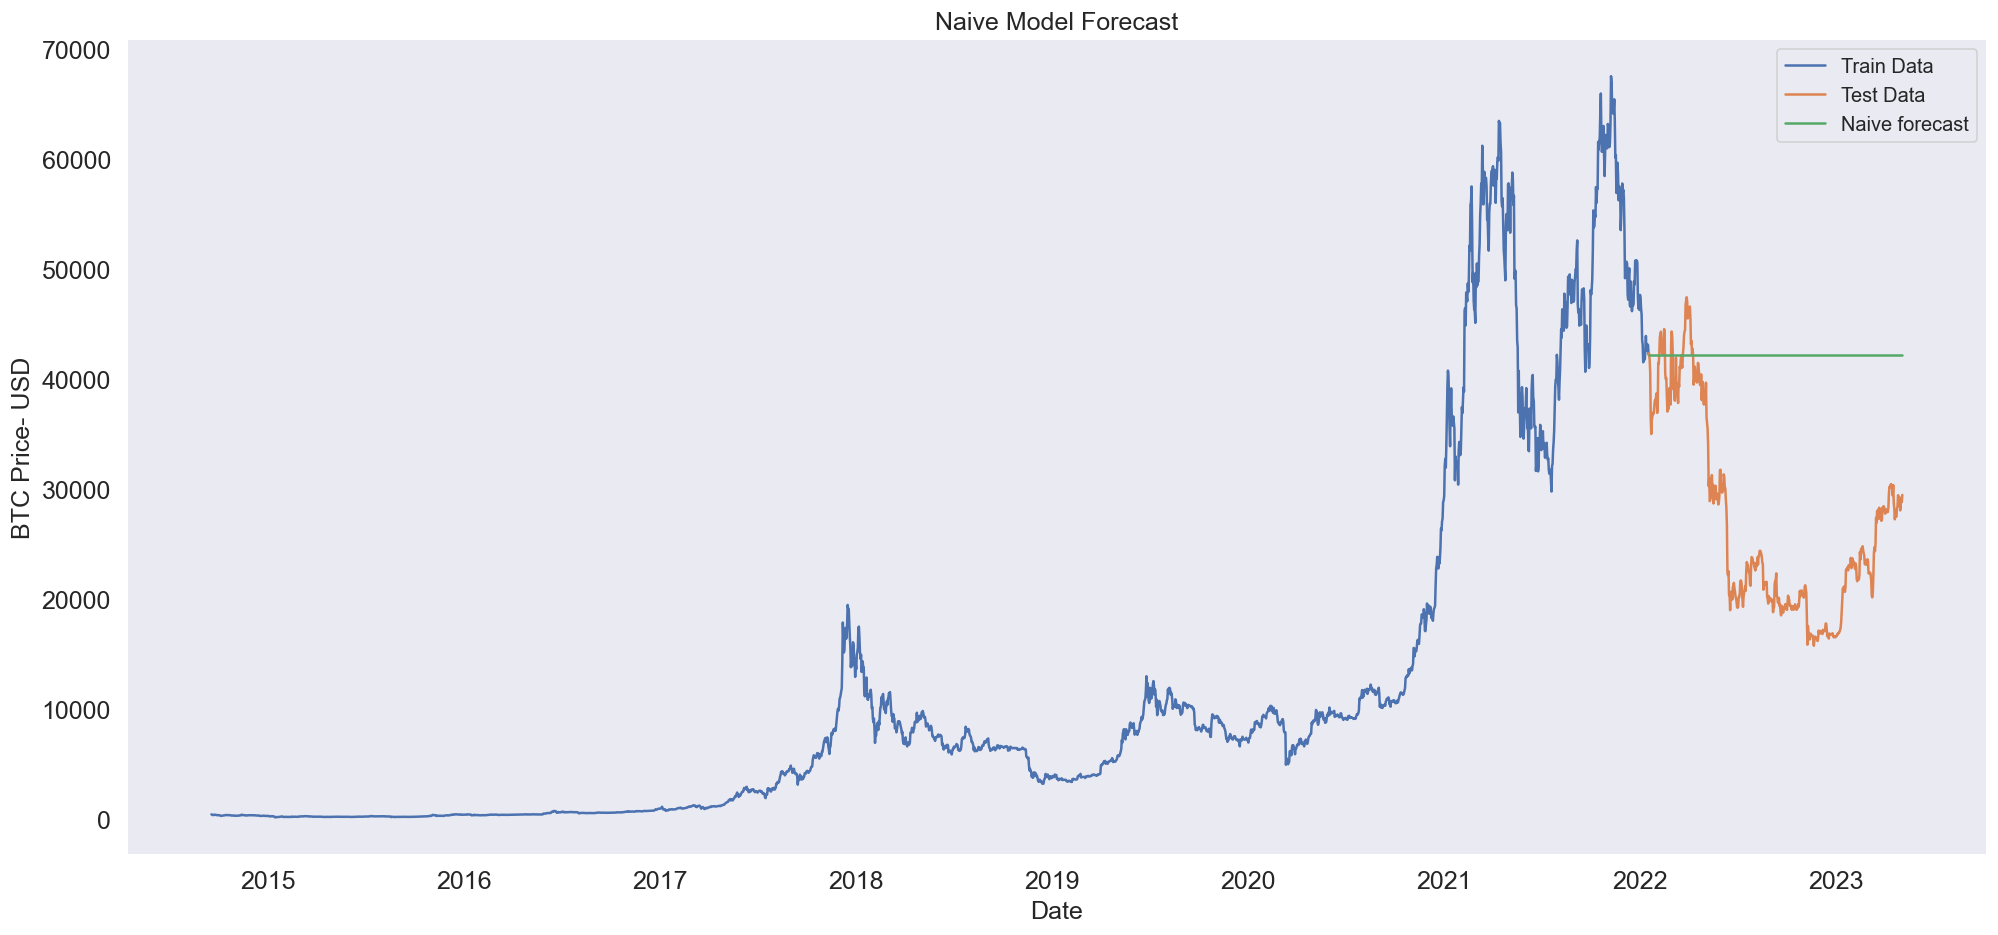

In [54]:
y_pred_naive = test.copy()
y_pred_naive['naive_forecast'] = train['close'][train_len-1]

plt.figure(figsize=(20,9))
plt.grid()
plt.plot(train['close'], label='Train Data')
plt.plot(test['close'], label='Test Data')
plt.plot(y_pred_naive.index, y_pred_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Model Forecast', fontsize=15)

# Labels
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Sub labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12);
plt.show()


In [55]:
# Root mean squared error
rmse_test = np.sqrt(mean_squared_error(test['close'], y_pred_naive['naive_forecast'])).round(2)
print('RMSE - Test error :', rmse_test)

RMSE - Test error : 17854.5


# Train Test Split

In [56]:
# Define train and test sets (85 % train, 15% test set)

train = close_ts.iloc[:-int(len(close_ts) * 0.15)]
test = close_ts.iloc[-int(len(close_ts) * 0.15):]

print('close_ts length   :', len(close_ts))
print('train data length :', len(train))
print('test data length  :', len(test))

close_ts length   : 3153
train data length : 2681
test data length  : 472


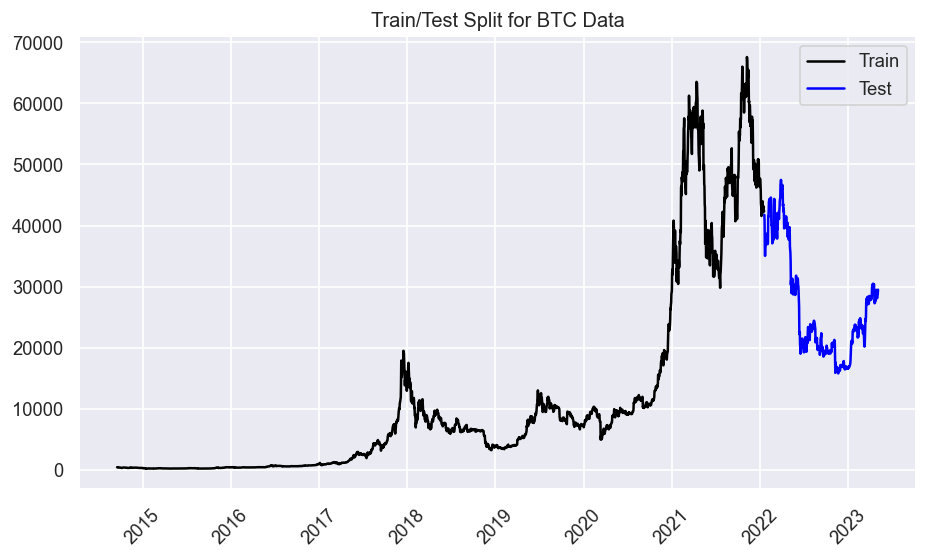

In [57]:

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(train, color = "black", label='Train')
ax.plot(test, color = "blue", label='Test')
ax.set_title("Train/Test Split for BTC Data")

# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Train.png", transparent = True, dpi=150)

plt.legend();

In [76]:
# We will now set aside our test set to build our model on the train

split = TimeSeriesSplit()

In [77]:
# Check the train 1st differencing stationary
dftest = adfuller(train.diff().dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
p_val = adfuller(close_diff[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

1. ADF         :  -8.386293849340852
2. P-Value     :  2.4333399885007473e-13
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2651
5. Critical Values :
	 1% :  -3.4328191223134246
	 5% :  -2.862630872437016
	 10% :  -2.567350709015523
The p-value in Dickey-Fuller statistical test is 8.1141213358187e-16,
Differenced data is STATIONARY.


# ARIMA Model Daily Closing Price

* ARIMA model is useful in the cases where the time series is non-stationary. And the differencing is required to make the time series stationary. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

* ARIMA models are denoted with the notation seasonal parameter as wel as ARIMA(p, d, q). 
* These three parameters emphasize seasonality, trend, and noise in data
* The 1st parameter corresponds to the lagging (past values - AR term), 

* The 2nd corresponds to differencing (this is what makes non-stationary data stationary- differencing/ integration order), 
* The 3rd parameter corresponds to the white noise (for modeling shock events- MA term- moving average lags). 



In [78]:
# Instantiate and fit the model
# I have to difference my data, because train is not stationary. This model will not perform well already.
# So I start d=1, no need to try d=0, because I know my train data is non-stationary.

ar_1 = ARIMA(train, order=(1, 1, 1)).fit()
ar_2 = ARIMA(train, order=(3, 1, 3)).fit()
ar_3 = ARIMA(train, order=(10, 1, 10)).fit()


In [79]:
# Prediction train
train_pred_1 = ar_1.predict()
train_pred_2 = ar_2.predict()
train_pred_3 = ar_3.predict()

# Root Mean Squared Error of train data
train_error_1 = np.sqrt(mean_squared_error(train, train_pred_1))
train_error_2 = np.sqrt(mean_squared_error(train, train_pred_2))
train_error_3 = np.sqrt(mean_squared_error(train, train_pred_3))

In [80]:
# Prediction test
y_pred_1 = ar_1.predict(start = test.index[0], end = test.index[-1])
y_pred_2 = ar_2.predict(start = test.index[0], end = test.index[-1])
y_pred_3 = ar_3.predict(start = test.index[0], end = test.index[-1])

In [84]:
print('RMSE - Train error 1 :', train_error_1)
print('RMSE - Train error 2 :', train_error_2)
print('RMSE - Train error 3 :', train_error_3)
print('AIC ar_1:', ar_1.aic)
print('AIC ar_2:', ar_2.aic)
print('AIC ar_3:', ar_3.aic)
print(ar_3.summary())


RMSE - Train error 1 : 761.0690301600946
RMSE - Train error 2 : 757.718684370286
RMSE - Train error 3 : 740.8152327436065
AIC ar_1: 43174.27405652436
AIC ar_2: 43158.986955174245
AIC ar_3: 43073.23807331349
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2681
Model:               ARIMA(10, 1, 10)   Log Likelihood              -21515.619
Date:                Mon, 29 May 2023   AIC                          43073.238
Time:                        18:06:40   BIC                          43197.003
Sample:                    09-17-2014   HQIC                         43118.012
                         - 01-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.

**Interpretation ar_3 model result:**
    
* RMSE  : 740.8152327436065
* AIC    : 43073.23807331349

> Both AIC and RMSE train score is very high. 

> Let's plot and see all predictions comparing to my train and test data. Let's score my test RMSE.

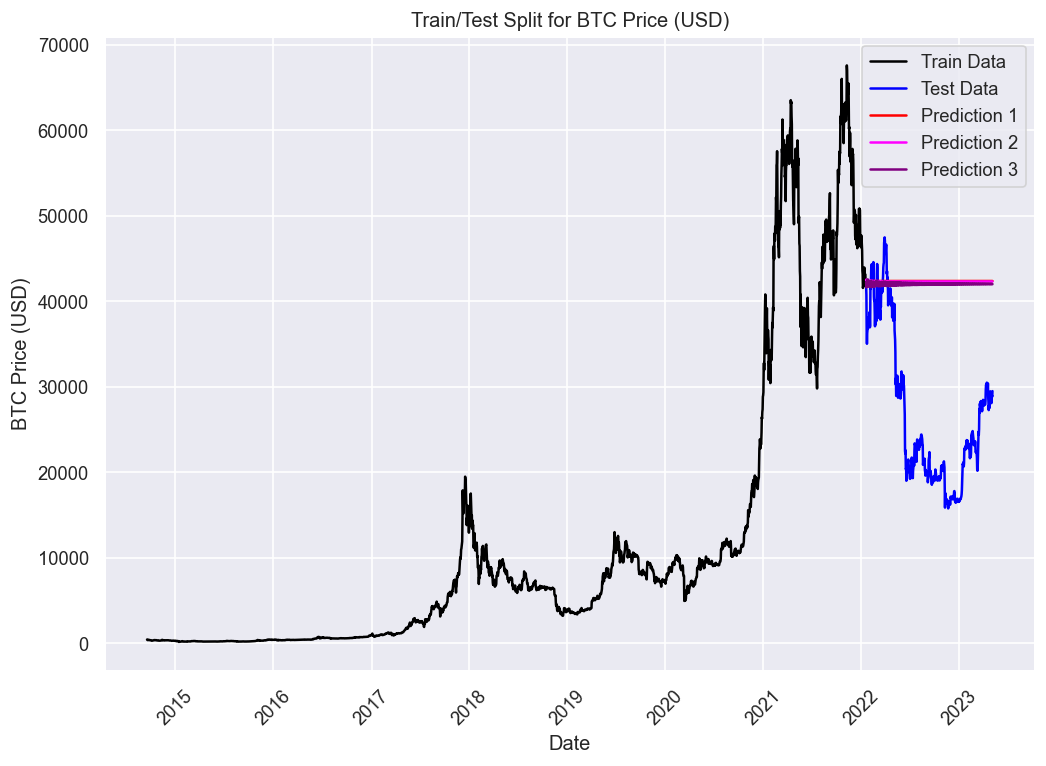

In [83]:
# Visualize the prediction options to see more interpretable 
plt.figure(figsize=(10,7))
plt.plot(train, color = "black",label='Train Data')
plt.plot(test, color = "blue",label='Test Data')
plt.ylabel('BTC Price (USD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for BTC Price (USD)")
plt.plot(y_pred_1, color='red', label = 'Prediction 1')
plt.plot(y_pred_2, color='magenta', label = 'Prediction 2')
plt.plot(y_pred_3, color='purple', label = 'Prediction 3')

plt.legend();

# ARIMA Model Forecast Daily Closing Price
* The lowest train error belongs to ar_3 model, 740. It's still high as mentioned above, but it's the lowest among the models.

* I will forecast the BTC price for this model.

In [68]:
y_pred_3 =ar_3.get_forecast(len(test.index))

## Confidence interval, alpha = 0.05
y_pred_df = y_pred_3.conf_int(alpha= .05)

y_pred_df['Predictions'] = ar_3.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df['Predictions']

test_error = np.sqrt(mean_squared_error(test, y_pred_out))
output = ar_3.predict(start='2023-05-05',end='2024-12-31')

print('Test RMSE   :', test_error)

Test RMSE   : 17673.253151608238


* Test RMSE   : 17673.253151608238 
* Test RMSE is very high. 

> Let's visualize and compare my test prediction, forecast, train and test data as well.

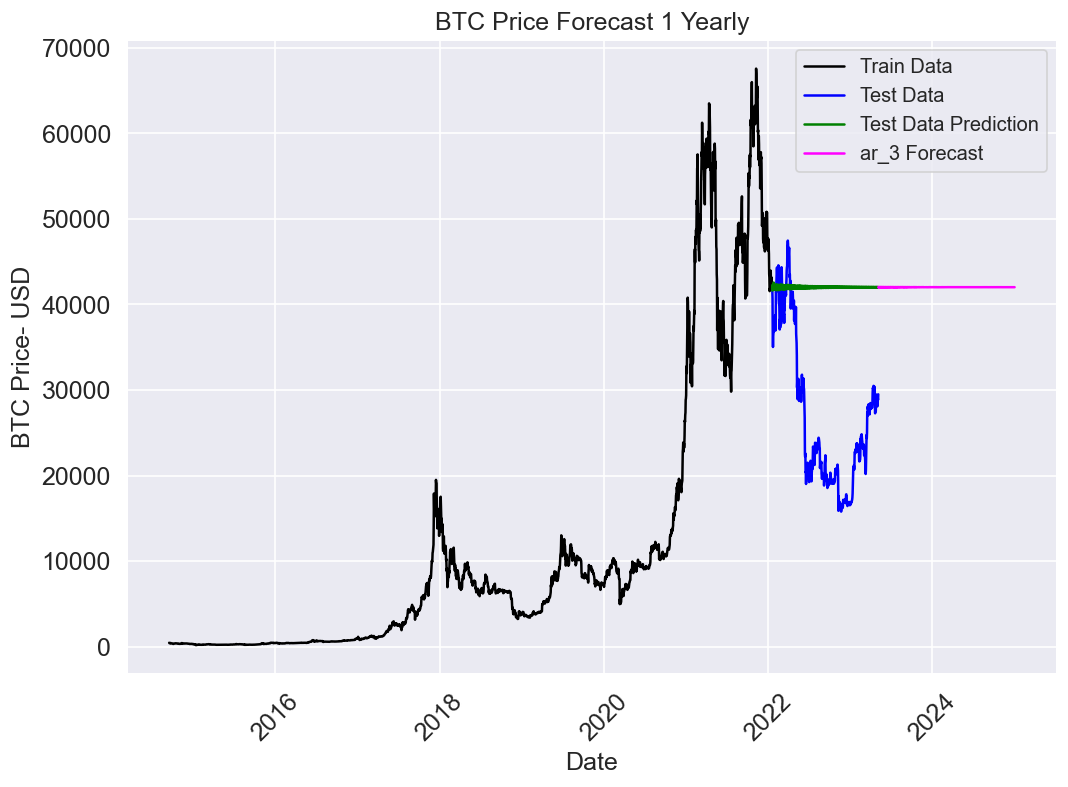

In [69]:
# Visualize forecast ARIMA Model 

plt.figure(figsize=(10,7))
plt.plot(train, color='black', label='Train Data')
plt.plot(test, color='blue', label='Test Data')

# Labels
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Sub labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('BTC Price Forecast 1 Yearly', fontsize=15)

plt.plot(y_pred_out, color= 'green', label= 'Test Data Prediction')
plt.plot(output, color='magenta', label='ar_3 Forecast')

# Rotate x-axis to read easier
plt.xticks(rotation=45)

plt.legend(fontsize=12);


* It is obviously extreme score my test error Test RMSE : 17673.253151608238.
As seen above forecast graph; ARIMA models don't work well for all models. 
It explains that the model is not working well for daily prediction. As seen on the decomposition visualization, there is extreme seasonality. I should deal with it.


# RESAMPLE CLOSING PRICE MONTHLY
* Decomposition and model results displays that my model is not working for daily price well. I have seasonalit and trend. I wresample my closing price as Monthly. I will model again as monthly.


In [85]:
# Resample closing price Monthly
close_mts = df['close'].resample('M').mean()
close_mts

Date
2014-09-30      407.182428
2014-10-31      364.148873
2014-11-30      366.099799
2014-12-31      341.267871
2015-01-31      248.782547
                  ...     
2023-01-31    20250.717490
2023-02-28    23304.539202
2023-03-31    25116.900895
2023-04-30    28857.574544
2023-05-31    28824.324609
Freq: M, Name: close, Length: 105, dtype: float64

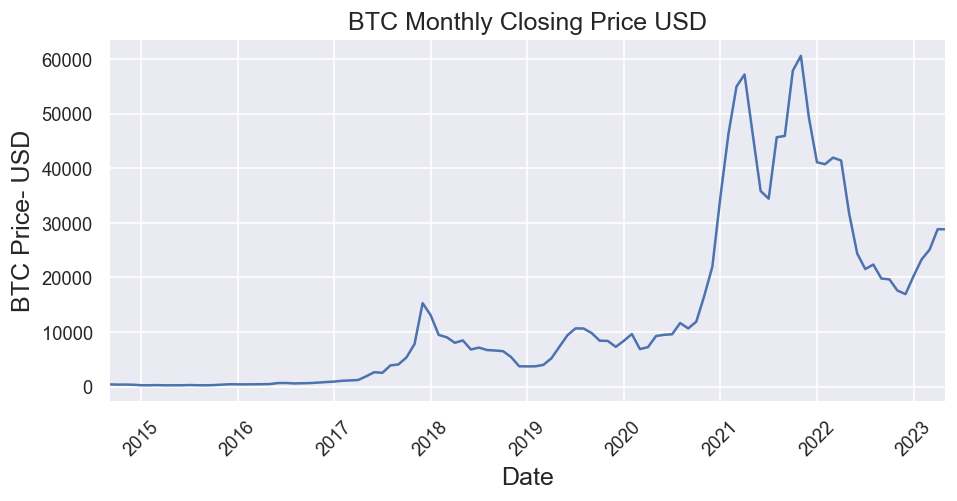

In [87]:
# visualize the monthly closing price time series 
# Graphs shows that BTC price is unstable distinguishly.
close_mts.plot(figsize=(9, 4))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

# Labels
plt.title('BTC Monthly Closing Price USD', fontsize=15)
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)


#Save the figure
plt.savefig("Monthly Closing Price.png", transparent = True, dpi=150)
plt.show()

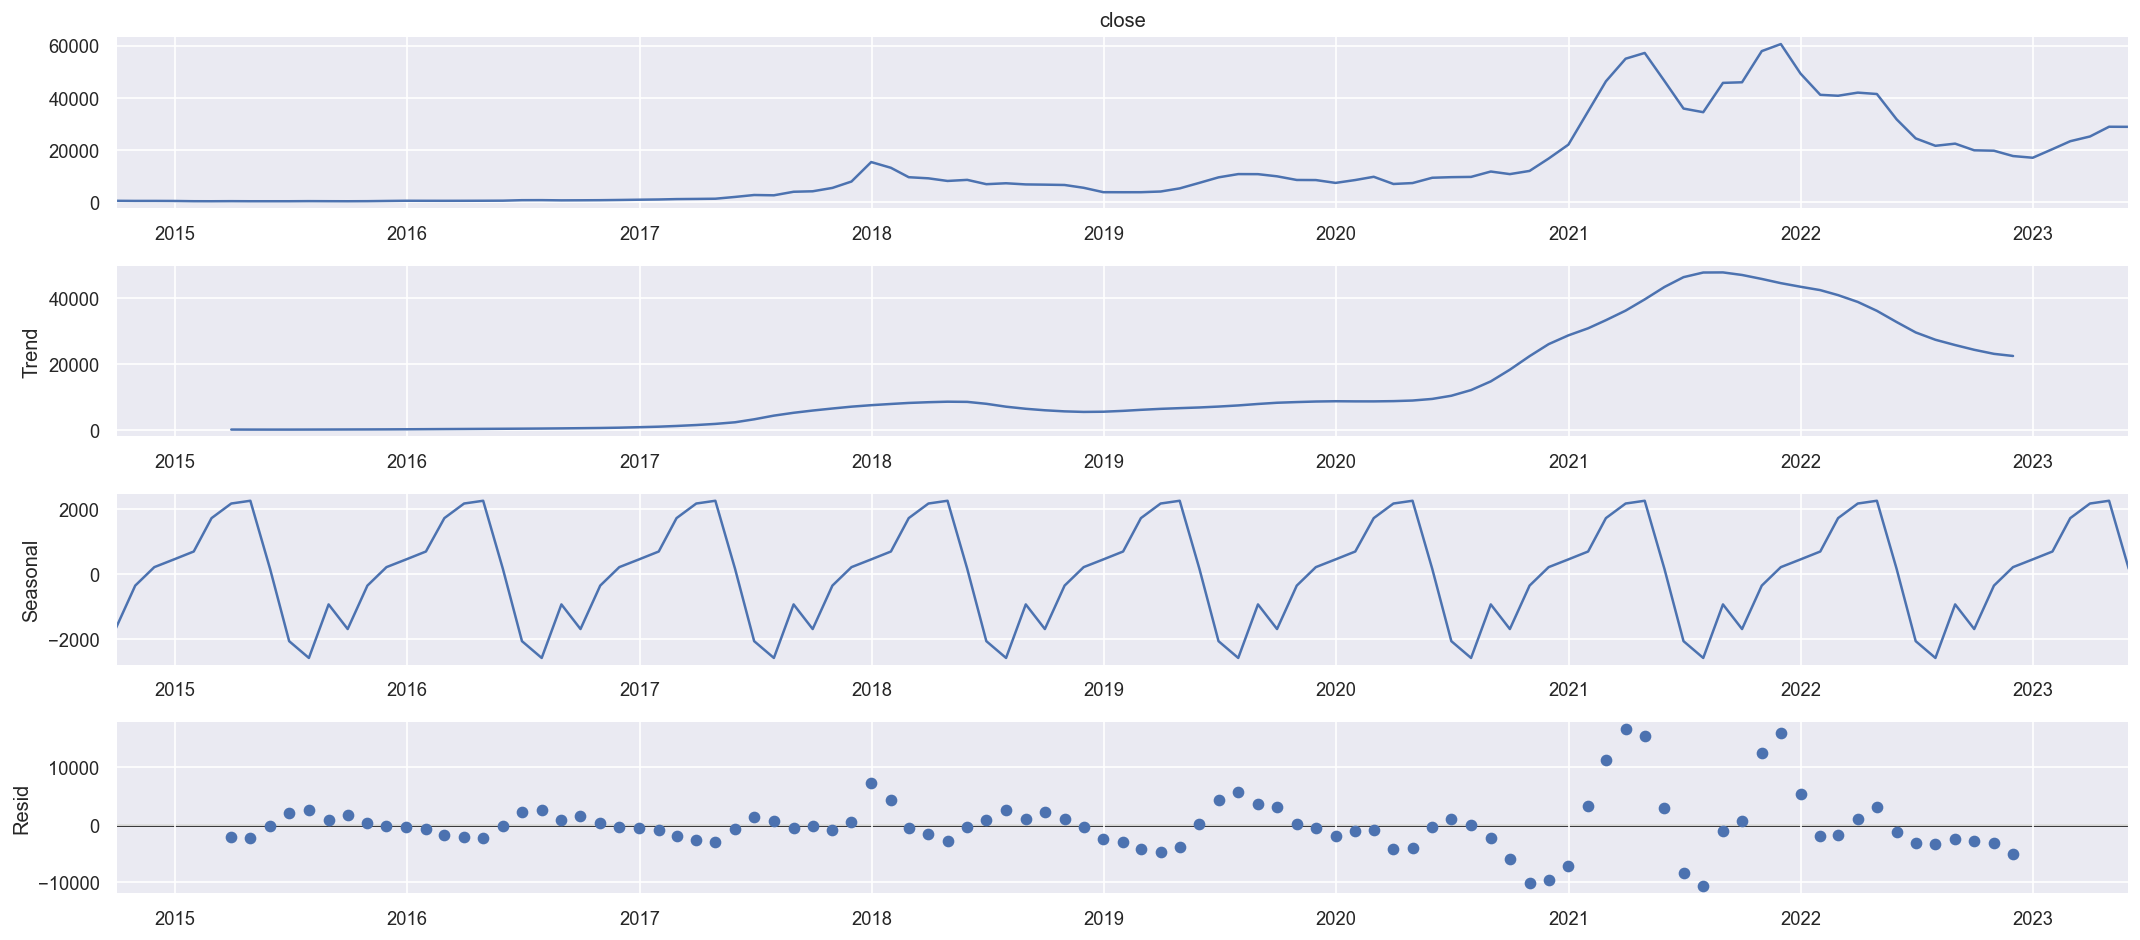

In [103]:
# Decompose my monthly close time series into three distinct components
# Trend
# Seasonality
# Noise

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(close_mts, model='additive')
fig = decomposition.plot()

#Save the figure
plt.savefig("Decomposition Monthly BTC.png", transparent = True, dpi=150)
plt.show()


* I can see that the range of trend and residual is pretty much different range, I can say that trend is having variation between 20K to 40K, and most of the time residual is having the variation around until 2021, it has a extreme range after 2021.I can see that it varies between 0 to 2000, which is a high difference range for the seasonality.

# SARIMAX MODEL

* SARIMAX, Seasonal Autoregressive Integrated Moving Average commonly used as a method for time series forecasting.
* SARIMAX models have same parameters with ARIMA (p,d,q), in addition to that they differentiate with the notation seasonality and eXogenous factors than ARIMA.
* These three parameters are seasonality, trend, and noise in data

In [89]:
# Parameter combinations 
# We will focus on to use 'grid search' to find the optimal set of parameters 
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [90]:
# Let's find the best AIC score and the most optimal parameter combination among them for the best performance model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(close_mts,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2366.3749005646578
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2101.1518679355577
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1851.2229584884512
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2054.257402019919
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1794.776092510484
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2800.479904278503
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1865.5057009466498
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1572.3843054848219
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2495.793104014758
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2067.3070124300016
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2044.4175901784024
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1865.320978972141
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1811.5238271387593
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1793.1385592097708
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:3103.746693128911
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1595.19963211253
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1558.106688565657
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1987.0403693468734
A

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1491.2182881827493
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:4202.88350214844
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1394.6851251274245
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1288.2605737283423
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:2020.7327554142325
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1548.8183772540538
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1550.812467958185
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1491.7616742887578
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1335.7303425007397
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1335.8214202271433
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:2912.8053861440058
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:1144.2173511206724
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:1111.6539063513633
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:1994.9167081206458
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1978.3674576429466
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1754.0246658358176
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1533.8427260980409
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1792.986551972

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:1786.2277886947006
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1947.1583302032643
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1749.8134632294675
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1540.302895362192
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1765.5552822717686
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1517.4565255658579
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:5430.775332827845
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1613.8019645705658
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1341.0410805355684
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2568.4824973926616
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1764.5731326105629
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1730.380504141512
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1533.1622820965301
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1562.3581927240525
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1519.4314600521764
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2483.0019927546164
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:1391.142138741952
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:1308.1940118026

ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1514.0600027443722
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2437.7674942130934
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:1364.3094283329567
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1331.137992693916
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:2660.6664262013364
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1518.7553837004607
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1520.476786428953
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1503.9545914990526
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:1305.5609260994013
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:1307.1156203340645
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:2432.5598939630036
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:1112.3587754255934
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:1109.0874290303611
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:1769.4651120102478
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1914.5499532145427
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1696.482618993404
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1480.6913605253164
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:1737.503134431

ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1513.6073349493006
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1769.3970714631223
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1516.9786175846543
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:3910.370830363865
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1617.7008697595647
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:1340.28313675663
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:2321.897515952745
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1727.677904215577
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1729.6709101099307
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1515.586368316653
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1526.596852258053
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1518.9208316136605
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1313.1704323305084
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:1352.4583630444915
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:1335.6071286523636
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:2065.8259834962464
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1513.5766502361248
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1515.573521973661


In [240]:
# The lowest AIC, ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0

SAR_1 = SARIMAX(close_mts,
              order=(1, 0, 1),
              seasonal_order=(0, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = SAR_1.fit()
#print(results.summary())

In [241]:
# Check Root Mean Squared Error
# Check Akaike Information Criteria

y_pred_mod = results.predict(typ='levels')
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, y_pred_mod)))
print('AIC SAR model :', results.aic)

RMSE Train error : 3.371007515290763e+21
AIC SAR model : 10.0


LinAlgError: singular matrix

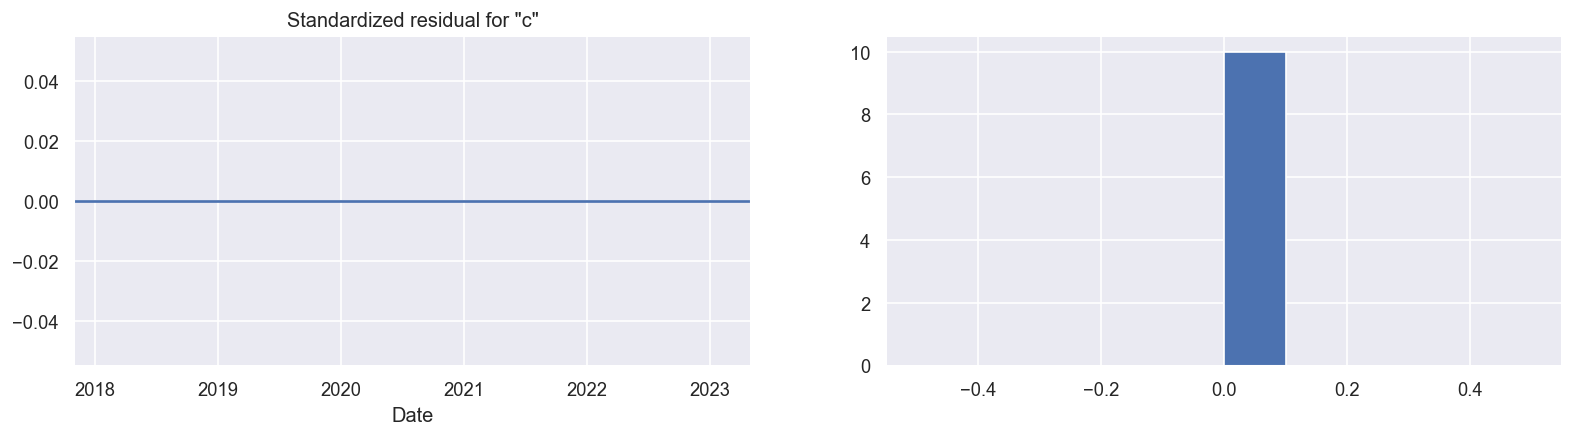

In [242]:
# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [91]:
# The lowest AIC, ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:1078.7534882209588

SAR_2 = SARIMAX(close_mts,
              order=(2, 2, 2),
              seasonal_order=(2, 2, 1, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = SAR_2.fit()

print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                close   No. Observations:                  105
Model:             SARIMAX(2, 2, 2)x(2, 2, [1], 12)   Log Likelihood                -531.377
Date:                              Mon, 29 May 2023   AIC                           1078.753
Time:                                      18:28:36   BIC                           1094.516
Sample:                                  09-30-2014   HQIC                          1084.815
                                       - 05-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3518      0.392      3.449      0.001       0.584       2.120
ar.L2         -0.76

RMSE Train error : 3404.4901585722287
AIC SAR model    : 1078.7534882209588


<Figure size 2160x960 with 0 Axes>

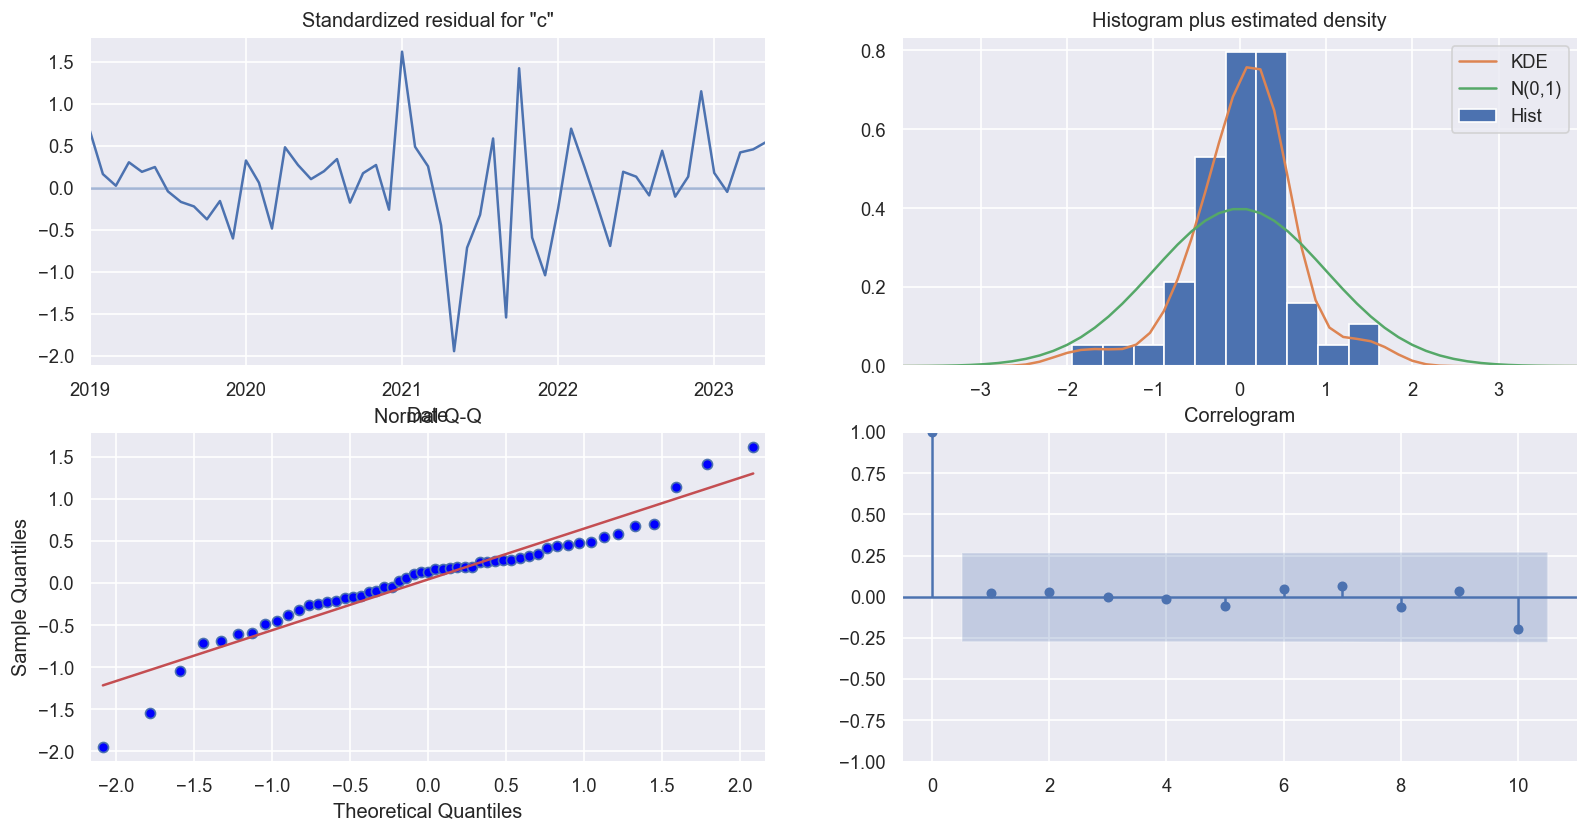

In [104]:
# Let's predict model
y_pred_SAR_2 = results.predict(typ='levels')
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, y_pred_SAR_2)))
print('AIC SAR model    :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
#Save figure
plt.savefig("Diagnostic SAR_2 Model.png", transparent = True, dpi=150)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [102]:
print('RMSE Test error :', np.sqrt(mean_squared_error(test, y_pred_SAR_2)))

ValueError: Found input variables with inconsistent numbers of samples: [472, 105]

# GRAFIGI YYOURMLA !!
* The above diagnostic plot is not perfect, however, my model diagnostics suggest that the model residuals are almost close to normally distributed.

In [94]:
# 
close_mts['2021':]

Date
2021-01-31    34761.649950
2021-02-28    46306.798968
2021-03-31    54998.008695
2021-04-30    57206.720052
2021-05-31    46443.286668
2021-06-30    35845.154688
2021-07-31    34444.973790
2021-08-31    45709.022682
2021-09-30    45939.771484
2021-10-31    57911.970514
2021-11-30    60621.488802
2021-12-31    49263.209174
2022-01-31    41114.422379
2022-02-28    40763.474051
2022-03-31    41966.237525
2022-04-30    41435.319662
2022-05-31    31706.105217
2022-06-30    24383.685482
2022-07-31    21539.253843
2022-08-31    22366.266318
2022-09-30    19804.779232
2022-10-31    19650.525643
2022-11-30    17600.814323
2022-12-31    16949.608808
2023-01-31    20250.717490
2023-02-28    23304.539202
2023-03-31    25116.900895
2023-04-30    28857.574544
2023-05-31    28824.324609
Freq: M, Name: close, dtype: float64

# Validate Forecast

* To explore the accuracy of my forecasts, I will compare predicted BTC price to real BTC prices of the time series. 

* Then I will set forecasts to start 2021-12-31 to the end of the data

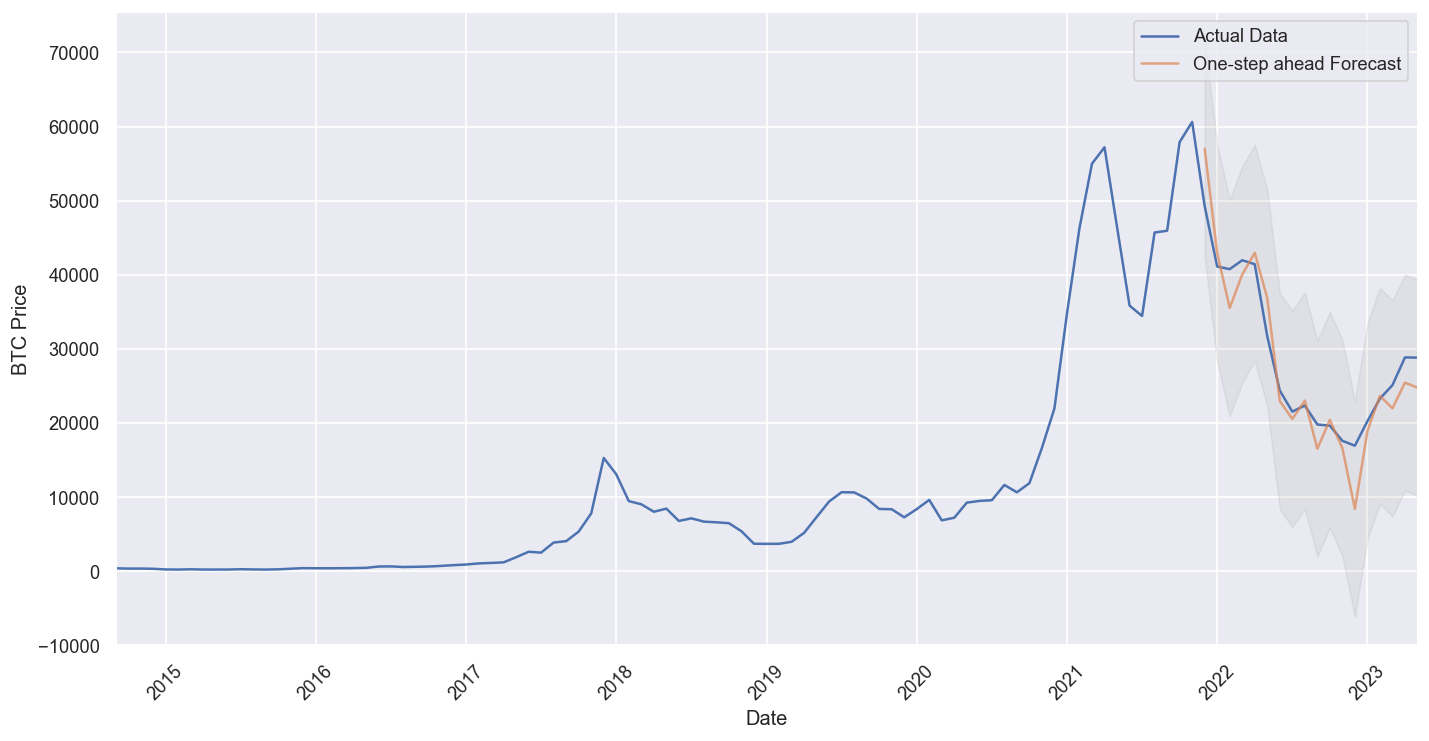

In [96]:

pred = results.get_prediction(start=pd.to_datetime('2021-12-31'), dynamic=False)

# Confidence Interval construction for the predicted mean 
pred_ci = pred.conf_int()

# Since 2014 I plot the actual data
ax = close_mts['2014-09-30':].plot(label='Actual Data')

# Forecasts a future output based on trends found through historical data
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)

ax.set_xlabel('Date')
ax.set_ylabel('BTC Price')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Prediction after 2019 BTC.png", transparent = True, dpi=150)
plt.legend()
plt.show()

* The above line graph displays that the Actual values is compared to the rolling forecast prediction.
* My forecast aligns with the actual values well. It shows a downward trend starts at the last of 2021, after 2023 it start to be upward.

In above graph, it is obviously seen the forecasting line is almost lying on the given values for this model. I don't even require the differencing method. Using this model now, I can predict the future values too

In [97]:
# Calculate the mean Squared Error 

close_mts_forecasted = pred.predicted_mean
close_mts_truth = close_mts['2021-12-31':]
mse = ((close_mts_forecasted - close_mts_truth) ** 2).mean()

# MSE is a measure of the quality of an estimator measures the average of the squares of the errors 
# The average squared difference between the estimated values and what is estimated
print('The Mean Squared Error of my forecasts      : {}'.format(round(mse, 2)))

# Root of Mean Squared Error
print('The Root Mean Squared Error of my forecasts : {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of my forecasts      : 13981458.21
The Root Mean Squared Error of my forecasts : 3739.18


# Visualize forecast

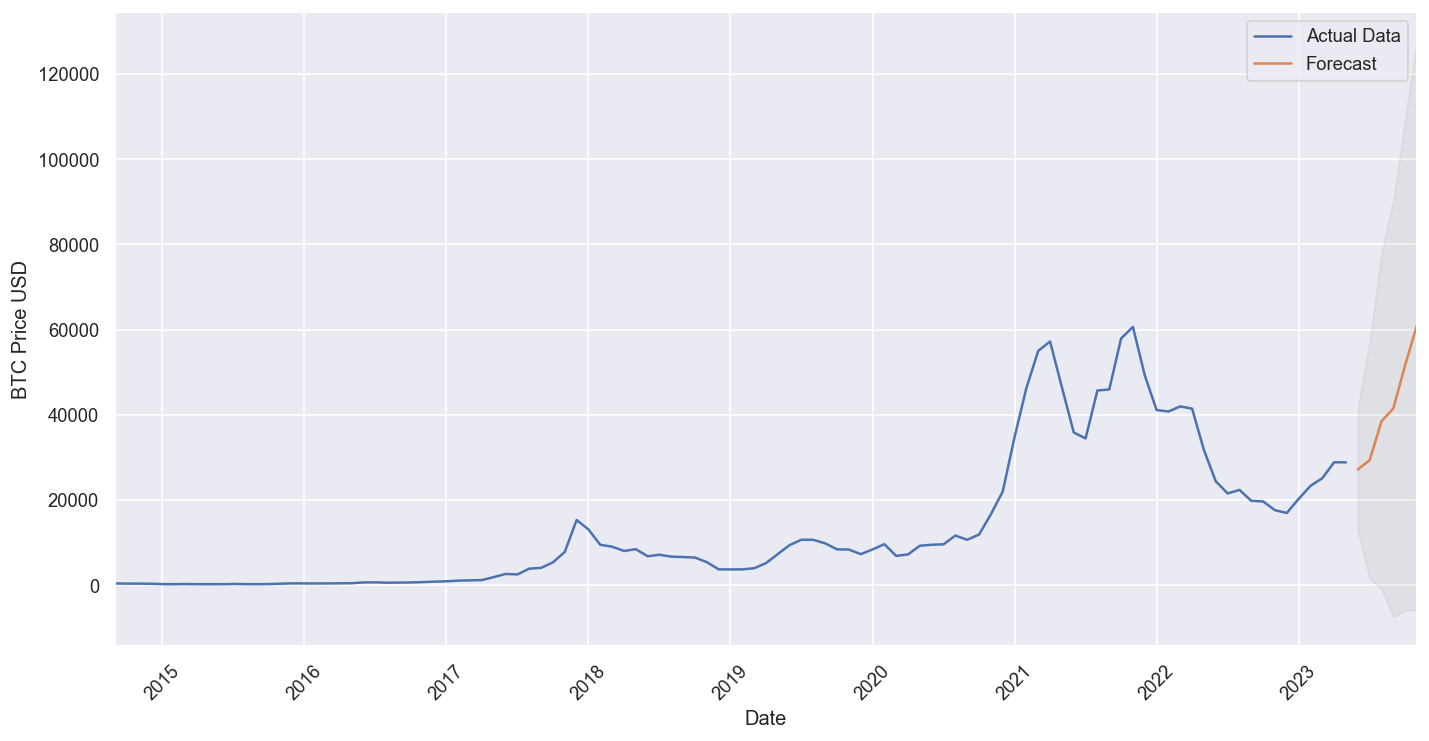

In [98]:
# 2023 prediction - 6 months later
pred_btc = results.get_forecast(steps=6)

# Confidence interval construction for the predicted mean 
pred_ci = pred_btc.conf_int()

# Since 2014 I plot the actual data
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))

# Prediction mean from 2019 to the end of the data
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')

# Generates a shaded region between a min and max boundary 
# It is useful for illustrating ranges
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("6 Months Forecast BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

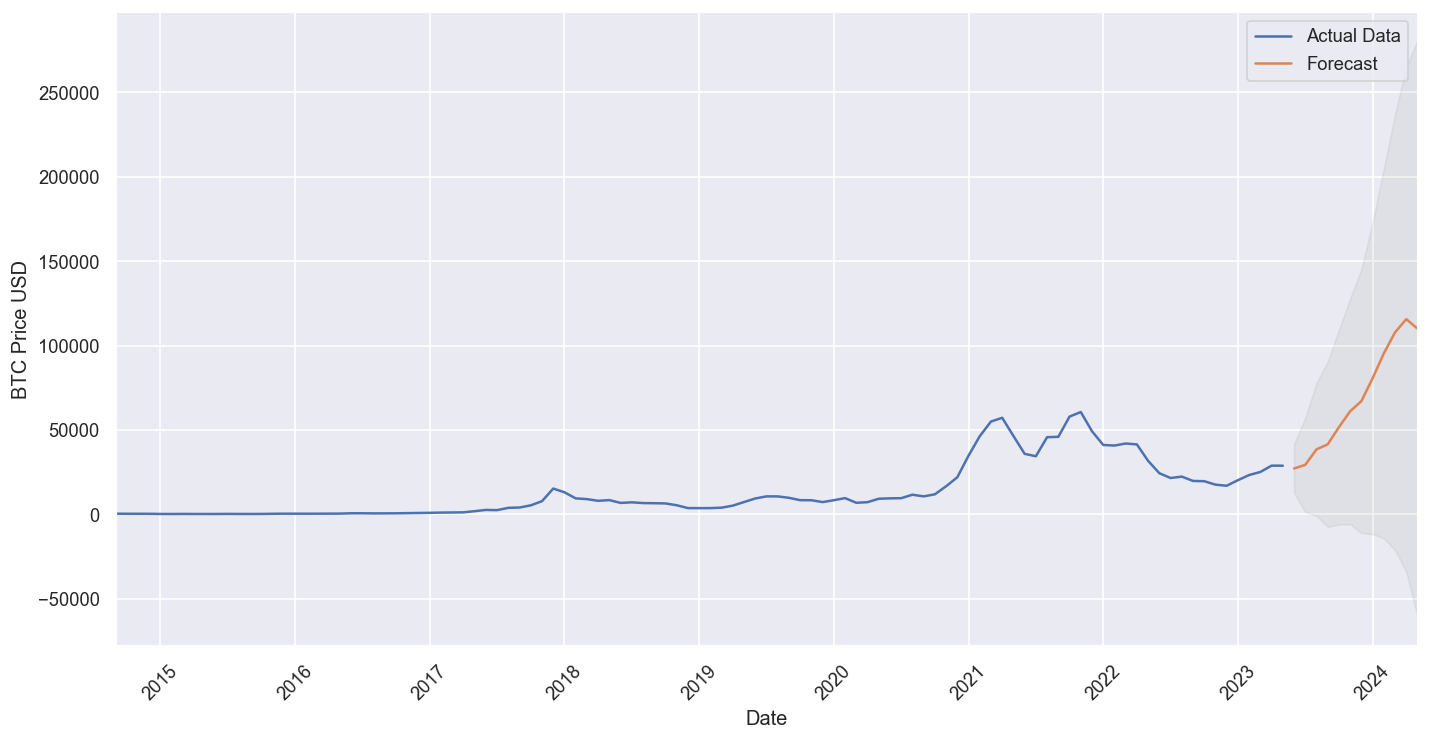

In [99]:
# 2024 prediction 
pred_btc = results.get_forecast(steps=12)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))

pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 2024 BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

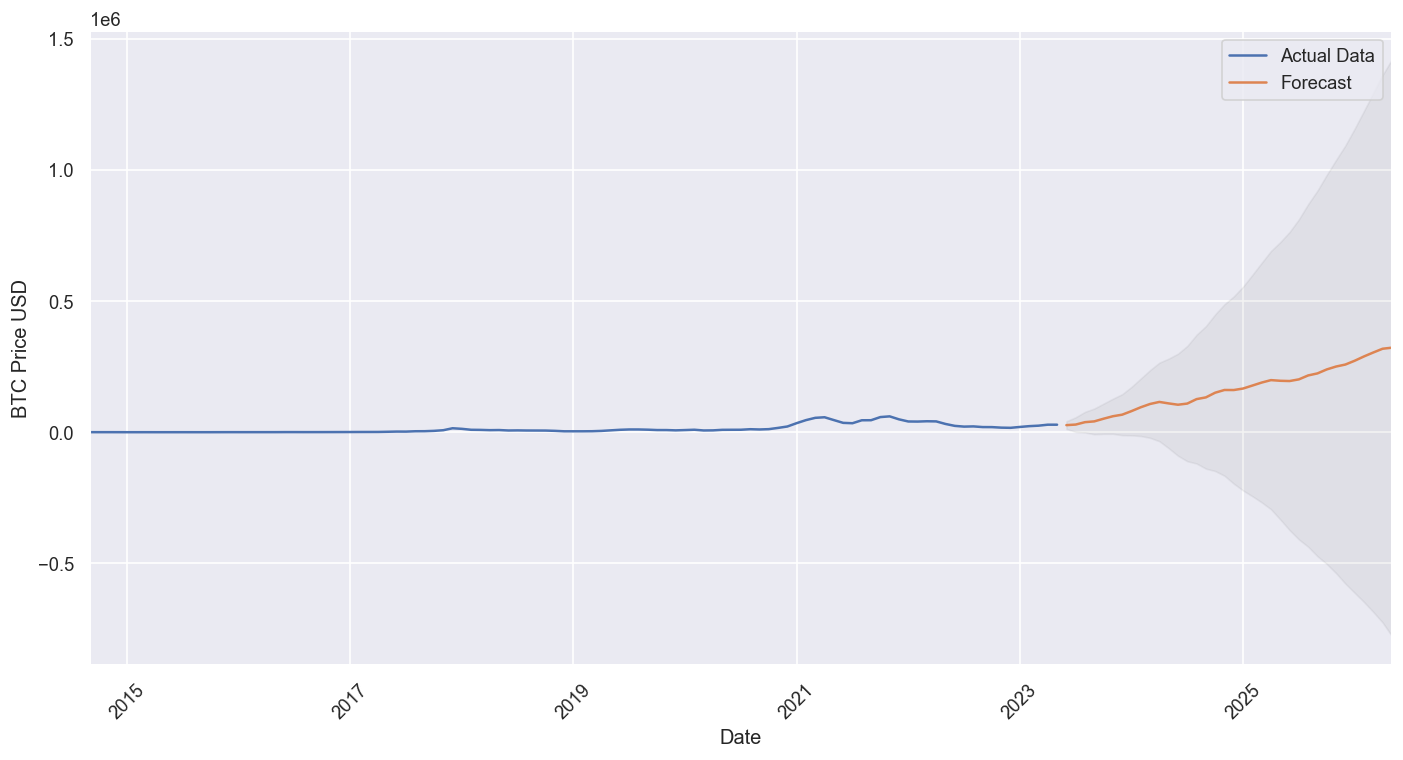

In [100]:
# 2025 forecast - 3 Yearly 

pred_btc = results.get_forecast(steps=36)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 3 Yearly BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

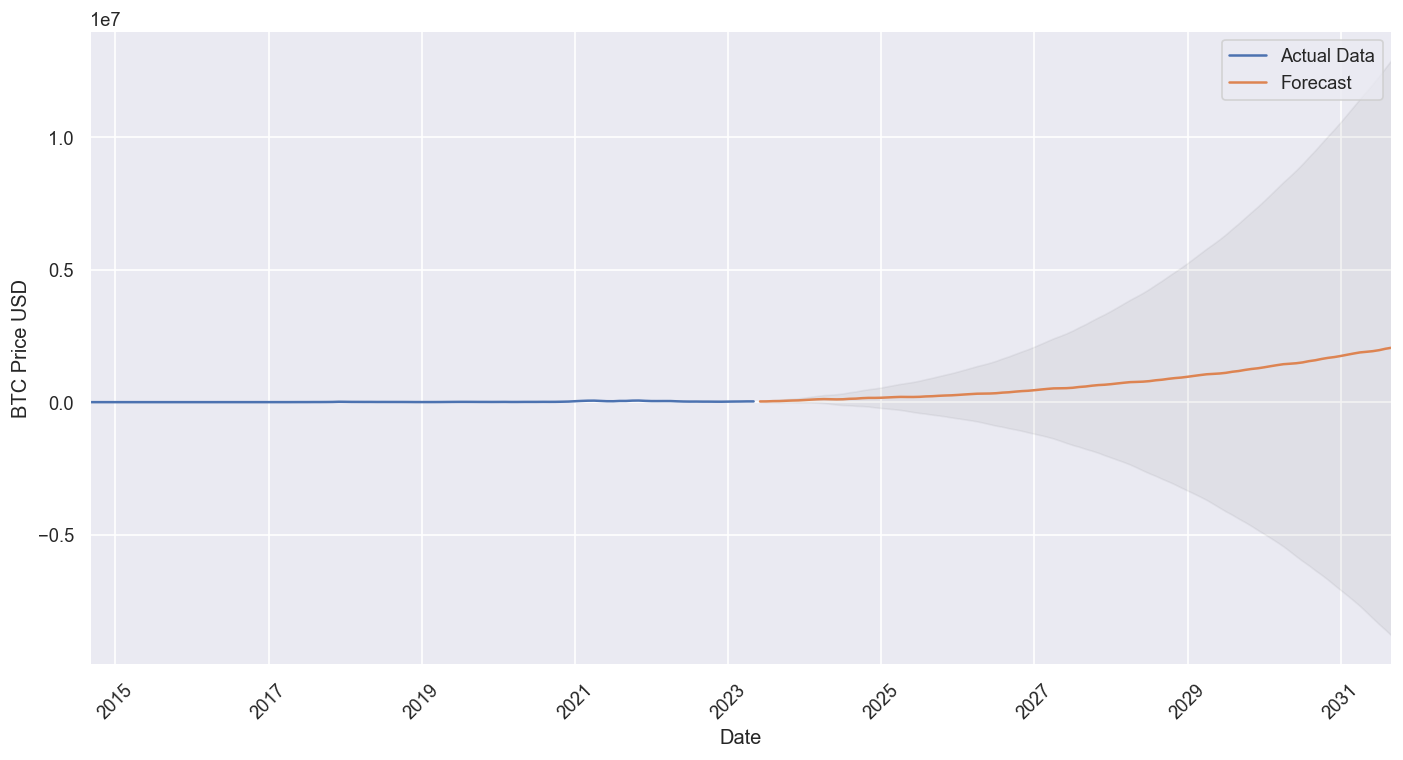

In [101]:
# 2031 prediction - 8 years prediction

pred_btc = results.get_forecast(steps=100)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 8 Yearly BTC.png", transparent = True, dpi=150)
plt.legend()
plt.show()

# EVALUATION

# FURTHERMORE

# DIFFERENCING =1, AR, MA TERM CHANGE


In [ ]:
# Parameter combinations 
# We will focus on to use 'grid search' to find the optimal set of parameters 
p = q = range(2, 5)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], d, x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [219]:
# Let's find the best AIC score and the mosrt optimal parameter combination among them for the best performance model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(close_mts,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:3386.7427999776137
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:1054.818783080095
ARIMA(2, 1, 2)x(2, 1, 4, 12)12 - AIC:829.5890389513197
ARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:2429.8633192896996
ARIMA(2, 1, 2)x(3, 1, 3, 12)12 - AIC:1056.300832390319
ARIMA(2, 1, 2)x(3, 1, 4, 12)12 - AIC:831.2096325083579
ARIMA(2, 1, 2)x(4, 1, 2, 12)12 - AIC:1432.1813212103316
ARIMA(2, 1, 2)x(4, 1, 3, 12)12 - AIC:850.4804729954964
ARIMA(2, 1, 2)x(4, 1, 4, 12)12 - AIC:832.7551348514181
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:2761.0746133929642
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:1035.6678795720345
ARIMA(2, 1, 3)x(2, 1, 4, 12)12 - AIC:811.0118828699777
ARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:1877.70806473323
ARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:1037.413893442811
ARIMA(2, 1, 3)x(3, 1, 4, 12)12 - AIC:812.8938876689339
ARIMA(2, 1, 3)x(4, 1, 2, 12)12 - AIC:1728.521891569854
ARIMA(2, 1, 3)x(4, 1, 3, 12)12 - AIC:850.8487584402352
ARIMA(2, 1, 3)x(4, 1, 4, 12)12 - AIC:814.8709932403431
ARIMA(

In [270]:
#ARIMA(3, 1, 2)x(4, 1, 2, 12)12 - AIC:24.0
# ARIMA(2, 1, 4)x(2, 1, 4, 12)12 - AIC:794.4776912208251
# ARIMA(2, 1, 4)x(4, 1, 3, 12)12 - AIC:853.0639171284553

# Length of endogenous variable must be larger the the number of lags used in the model and 
# the number of observations burned in the log-likelihood calculation.


#ARIMA(4, 1, 4)x(2, 1, 3, 12)12 - AIC:1022.8755679622076
#ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:1035.6678795720345
# ARIMA(2, 1, 2)x(4, 1, 2, 12)12 - AIC:1432.1813212103316
# ARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:2429.8633192896996

SAR_3 = SARIMAX(close_mts,
              order=(2, 1, 2),
              seasonal_order=(3, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = SAR_3.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  105
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1204.932
Date:                            Mon, 29 May 2023   AIC                           2429.863
Time:                                    16:51:47   BIC                           2449.753
Sample:                                09-30-2014   HQIC                          2437.534
                                     - 05-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0534         -0       -inf      0.000       1.053       1.053
ar.L2         -0.4805         -0   

RMSE Train error : 3328.329906707296
AIC SAR model    : 2429.8633192896996


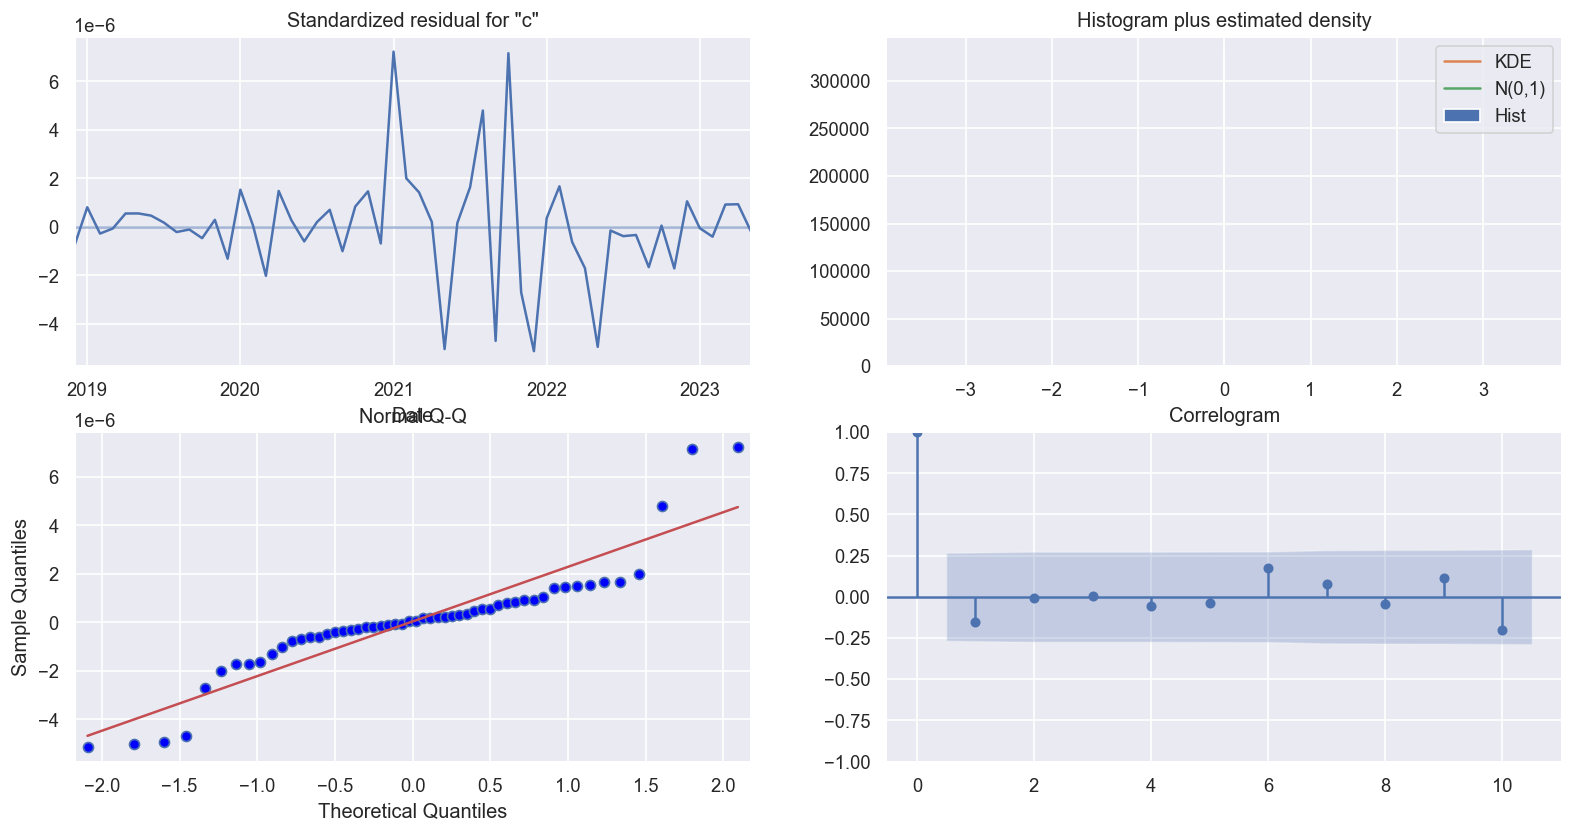

In [271]:
# Let's predict model
y_pred_SAR_3 = results.predict(typ='levels')
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, y_pred_SAR_3)))
print('AIC SAR model    :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [272]:
# Calculate the mean Squared Error 

close_mts_forecasted = pred.predicted_mean
close_mts_truth = close_mts['2021-12-31':]
mse = ((close_mts_forecasted - close_mts_truth) ** 2).mean()

# MSE is a measure of the quality of an estimator measures the average of the squares of the errors 
# The average squared difference between the estimated values and what is estimated
print('The Mean Squared Error of my forecasts      : {}'.format(round(mse, 2)))

# Root of Mean Squared Error
print('The Root Mean Squared Error of my forecasts : {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of my forecasts      : 13981458.21
The Root Mean Squared Error of my forecasts : 3739.18


# RESAMPLE YEARLY 